In [1]:
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
from pyclustering.cluster import kmeans , clique
import os
from itertools import combinations 
from itertools import product

import sklearn
import warnings
warnings.filterwarnings("ignore")


#parameters
nNodes=100
nClique=1
maxCliqueSize=20
density=0.05


####### enter number of clique along with number of respective edges manually below ################

size_of_clique=[]
no_of_clique=nClique
nodeSum=0
residue= (int)((nNodes-maxCliqueSize)/(nClique))


for i in range(no_of_clique-1):
    x=np.random.randint(3,residue-1)
    size_of_clique.append(x)

size_of_clique.append(maxCliqueSize)

print(size_of_clique)
total_no_of_nodes=nNodes
print("Total number of nodes in the graph ", total_no_of_nodes)

node_id=list(range(1,total_no_of_nodes+1))

print("Node ids")
print(node_id)

clique_list = [[] for j in range(no_of_clique)]

size=0
clique_nodes=[]

for i in range(no_of_clique):
    
    clique_list[i]=list(range((size+1),(size+size_of_clique[i]+1)))
    x=clique_list[i]
    for k in range(len(clique_list[i])):
        clique_nodes.append(x[k])
    size=size+size_of_clique[i]
    
print("Cliques")    
print(clique_list)

print(clique_nodes)

[20]
Total number of nodes in the graph  100
Node ids
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Cliques
[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [2]:
######### save clique lists ###################

with open("ground_truth_clique_list_new_0.05.txt", "w") as gtcl:
    for index5 in range(len(clique_list)):
        cluster_set=clique_list[index5]
        cluster_set_size=len(cluster_set)
        for index6 in range(cluster_set_size):
            gtcl.write("%s " % int(cluster_set[index6]))
        gtcl.write("\n")
        

In [3]:
######## find all comb. inter clique / between clique (nodes) edges  ###############

between_clique_all_comb=[]

for i in range(no_of_clique):
    for j in range(i+1,no_of_clique):
        
        clique_set1=clique_list[i]
        clique_set2=clique_list[j]
        
        new_comb=(list(product(clique_set1,clique_set2)))
        #print(new_comb)
        between_clique_all_comb.extend(new_comb)
    

    

In [4]:
print(len(between_clique_all_comb))

0


In [5]:
######## find all comb. of non clique (nodes) edges  ###############

print(node_id)
print(clique_nodes)

non_clique_nodes=list(set(node_id).difference(set(clique_nodes)))
print((non_clique_nodes))
non_clique_all_comb=list(combinations(non_clique_nodes,2))
print(len(non_clique_all_comb))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
3160


In [6]:
######## find all comb. between clique (nodes) and non clique (nodes) edges  ###############

clique_non_clique_all_comb=(list(product(clique_nodes,non_clique_nodes)))
print(len(clique_non_clique_all_comb))

1600


In [7]:
########### total number of non clique edges ##############3

total_no_of_non_clique_edges=[]
total_no_of_non_clique_edges.extend(between_clique_all_comb)
total_no_of_non_clique_edges.extend(non_clique_all_comb)
total_no_of_non_clique_edges.extend(clique_non_clique_all_comb)

print(len(total_no_of_non_clique_edges))

4760


In [17]:
non_clique_edges=total_no_of_non_clique_edges

print(len(non_clique_edges))

########### sample inter clique / non clique  edges ###################
random_selected_non_clique_edges=[]
nPortion=(int)(len(non_clique_edges)*density)
idx = np.random.randint(len(non_clique_edges), size=nPortion)
#print(np.sort(idx))
for i in range(len(idx)):  
    random_selected_non_clique_edges.append(non_clique_edges[idx[i]])


######### save edge lists ###################
total_clique_edges=0
with open("edge_file_new_0.05.txt", "w") as edgeid:
    
    for i in range(no_of_clique):
        clique_set=clique_list[i]
        
        clique_all_comb=np.array(list(combinations(clique_set,2)))
        total_clique_edges= total_clique_edges+len(clique_all_comb)
        #total_clique_edges= total_clique_edges+len(clique_all_comb)
        
        for i1 in range(len(clique_all_comb)):
            
            first_comb_clique=clique_all_comb[i1]
            
            n_source_node=first_comb_clique[0]
            n_target_node=first_comb_clique[1]
            
            
            edgeid.write("%s " % int(n_source_node))
            edgeid.write("%s " % int(n_target_node))
            edgeid.write("\n") 

    for i in range(len(random_selected_non_clique_edges)):

        first_comb_non_clique=random_selected_non_clique_edges[i]

        source_node=first_comb_non_clique[0]
        target_node=first_comb_non_clique[1]

        edgeid.write("%s " % int(source_node))
        edgeid.write("%s " % int(target_node))
        edgeid.write("\n")
edgeid.close()

print("Number of clique edges ",total_clique_edges)
print("Number of non-clique edges ",len(non_clique_edges))
print("Number of randomly selected non-clique edges ", len(random_selected_non_clique_edges))

4760
Number of clique edges  190
Number of non-clique edges  4760
Number of randomly selected non-clique edges  238


In [88]:
############################# generation edge file end #########################################

In [18]:
def reading_graph(edgefile):
    #Reads the input network in networkx.
    G = nx.read_edgelist(edgefile, nodetype=int, create_using=nx.Graph())
    for edge in G.edges():
        G[edge[0]][edge[1]]['weight'] = 1
        
    return G

In [19]:
G22=reading_graph('edge_file_new_0.05.txt')

node_id1=list(G22.nodes())
print(np.sort(node_id1))
print(len(node_id1))
print(len(G22.edges()))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
100
423


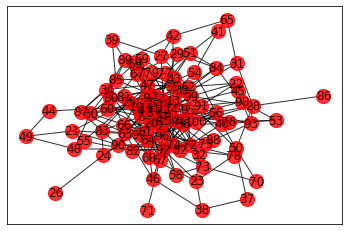

In [20]:
pos=nx.spring_layout(G22) # positions for all nodes
nx.draw_networkx(G22,pos,nodelist=node_id1, node_color='r', node_size=200, alpha=0.8)